# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ***************************************************************

# Reading the data file

In [2]:
GOT_battles_df = pd.read_csv('battles.csv')

In [3]:
pd.set_option('display.max_columns', None)
GOT_battles_df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [40]:
GOT_battles_df.shape

(38, 27)

# ****************************************************************************

# Inserting columns 'defense_win' and 'attack_win' in dataframe

In [32]:
GOT_battles_df['defense_win'] = GOT_battles_df['attacker_outcome'].apply(lambda x: 'No' if x == 'win' else ('Yes' if x == 'loss' else 'NA'))

In [33]:
GOT_battles_df['attack_win'] = GOT_battles_df['attacker_outcome'].apply(lambda x: 'Yes' if x == 'win' else ('No' if x == 'loss' else 'NA'))

# ***********************************************************************

# Plot showing count of wins and losses as a defender king

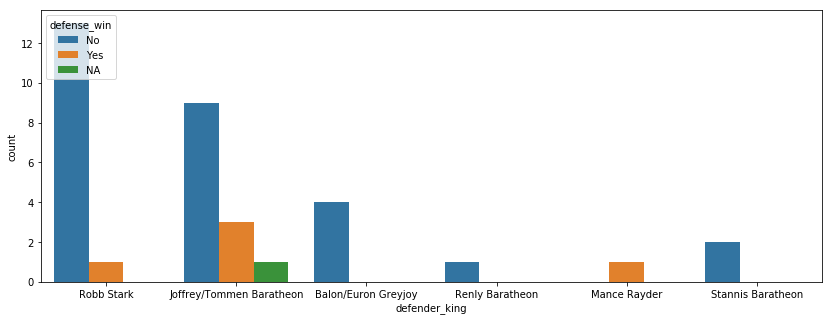

In [34]:
fig_dims=(14,5)
fig, new_ax = plt.subplots(figsize=fig_dims)
sns.countplot(GOT_battles_df['defender_king'], hue=GOT_battles_df['defense_win'])

# ************************************************************************

# Plot showing count of wins and losses as an attacker king

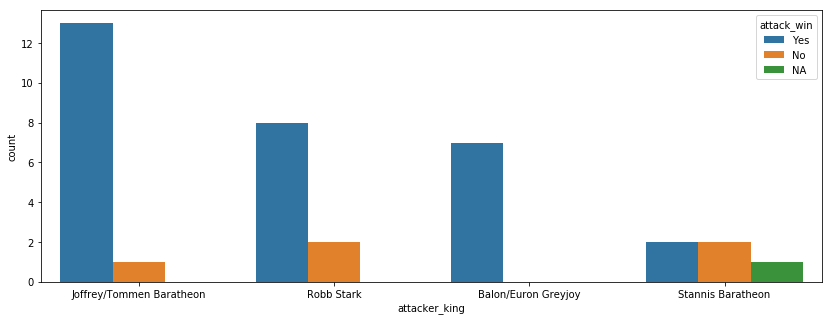

In [35]:
fig_dims=(14,5)
fig, new_ax = plt.subplots(figsize=fig_dims)
sns.countplot(GOT_battles_df['attacker_king'], hue=GOT_battles_df['attack_win'])

# ********************************************************************

# Calculating win percentage of different attacker kings

In [138]:
tot_win_at = list(GOT_battles_df[GOT_battles_df['attack_win']=='Yes']['attack_win'].groupby(GOT_battles_df['attacker_king']).count())
tot_win_at

[7, 13, 8, 2]

In [124]:
tot_attack = list(GOT_battles_df['attack_win'].groupby(GOT_battles_df['attacker_king']).count())
tot_attack

[7, 14, 10, 5]

In [118]:
king_lst = list(GOT_battles_df['attacker_king'].groupby(GOT_battles_df['attacker_king']).max())

In [139]:
attack_per = list(map(lambda x,y: x/y * 100, tot_win_at, tot_attack))
attack_per

[100.0, 92.85714285714286, 80.0, 40.0]

# Plot showing win percentage of different attacker kings

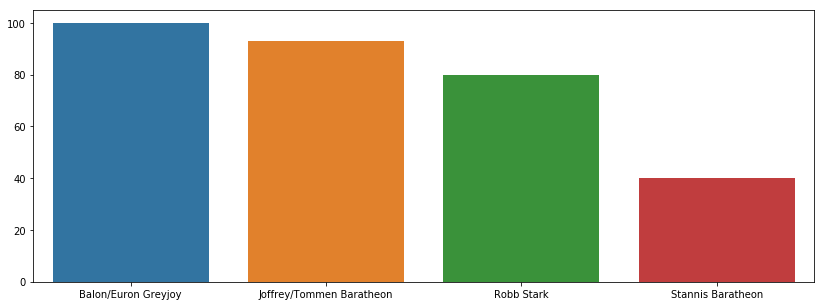

In [151]:
fig_dims=(14,5)
fig, new_ax = plt.subplots(figsize=fig_dims)
sns.barplot(king_lst, attack_per)

# ********************************************************************************

# Plot showing count of battles fought in different regions and type of battle

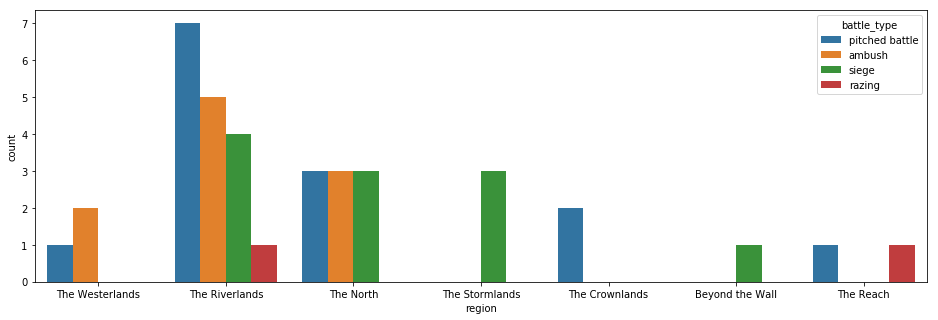

In [14]:
fig_dims=(16,5)
fig, new_ax = plt.subplots(figsize=fig_dims)
sns.countplot(GOT_battles_df['region'],hue = GOT_battles_df['battle_type'])

# Plot showing count of different types of battles fought

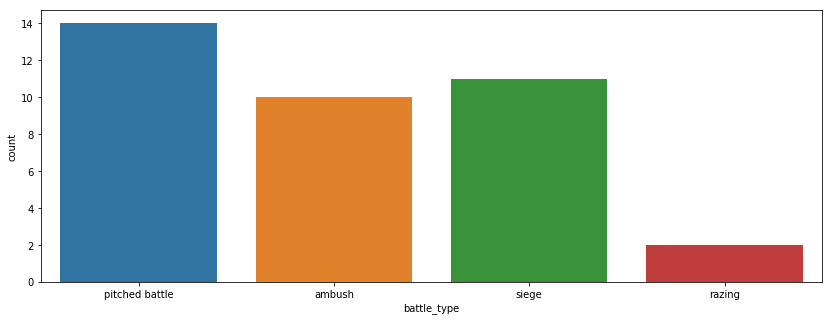

In [153]:
fig_dims=(14,5)
fig, new_ax = plt.subplots(figsize=fig_dims)
sns.countplot(GOT_battles_df['battle_type'])